# Análisis de Sentimientos

Solución Taller 11

In [59]:
#pip install googletrans

import pandas as pd
from googletrans import Translator


In [45]:
df = pd.read_csv ('C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/navidad.csv')

In [46]:
df.head(20)

,Unnamed: 0,tweet,date,city
0,0,Molde Bastón Navidad Termoformado Goma Eva Man...,2020-11-21 10:00:02,Bogotá
1,1,Navidad dejo de ser navidad desde que mi famil...,2020-11-21 09:41:41,Bogotá
2,2,¿Busca trabajo esta temporada? Tenga en cuenta...,2020-11-21 08:35:08,Bogotá
3,3,Ya decorada mi casa gracias a Dios vamos por u...,2020-11-21 08:31:20,Bogotá
4,4,mentiras que de navidad quiero dejar de estar ...,2020-11-21 06:00:12,Bogotá
5,5,@EmelRojasC @ConcejoDeBogota @manolitosalazar ...,2020-11-21 05:53:32,Bogotá
6,6,Es más fácil conseguir el Turbo Man para navid...,2020-11-21 05:48:25,Bogotá
7,7,Molde Alas Angel Recordatorios Fomi Navidad Tr...,2020-11-21 05:36:01,Bogotá
8,8,Ojo que el virus no tiene IVA. Sábado 21 terce...,2020-11-21 05:04:38,Bogotá
9,9,NAVIDAD !!! #libresfelicessanosproperosyabunda...,2020-11-21 05:00:59,Bogotá


In [35]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [41]:
from textblob import TextBlob

In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [47]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [48]:
df[['tweet_clean', 'links_2', 'hashtags', 'mentions']] = df.apply(text_clean, axis=1, result_type='expand')

In [50]:
df.head(50)

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions
0,0,Molde Bastón Navidad Termoformado Goma Eva Man...,2020-11-21 10:00:02,Bogotá,Molde Bastón Navidad Termoformado Goma Eva Man...,"[https://t.co/kdfPtAxHB7, https://t.co/1m1D1YU...",[],[]
1,1,Navidad dejo de ser navidad desde que mi famil...,2020-11-21 09:41:41,Bogotá,Navidad dejo de ser navidad desde que mi famil...,[],[],[]
2,2,¿Busca trabajo esta temporada? Tenga en cuenta...,2020-11-21 08:35:08,Bogotá,¿Busca trabajo esta temporada? Tenga en cuenta...,[https://t.co/7drflGgnes],[],[]
3,3,Ya decorada mi casa gracias a Dios vamos por u...,2020-11-21 08:31:20,Bogotá,Ya decorada mi casa gracias a Dios vamos por u...,[https://t.co/kedj4fVFGY],[],[]
4,4,mentiras que de navidad quiero dejar de estar ...,2020-11-21 06:00:12,Bogotá,mentiras que de navidad quiero dejar de estar ...,[],[],[]
5,5,@EmelRojasC @ConcejoDeBogota @manolitosalazar ...,2020-11-21 05:53:32,Bogotá,"Navidad para ella y su rosca, la que está...",[],[],"[@EmelRojasC, @ConcejoDeBogota, @manolitosalaz..."
6,6,Es más fácil conseguir el Turbo Man para navid...,2020-11-21 05:48:25,Bogotá,Es más fácil conseguir el Turbo Man para navid...,[],[],[]
7,7,Molde Alas Angel Recordatorios Fomi Navidad Tr...,2020-11-21 05:36:01,Bogotá,Molde Alas Angel Recordatorios Fomi Navidad Tr...,"[https://t.co/1GPrSYSfWT, https://t.co/a7Dajqo...",[],[]
8,8,Ojo que el virus no tiene IVA. Sábado 21 terce...,2020-11-21 05:04:38,Bogotá,Ojo que el virus no tiene IVA. Sábado 21 terce...,[https://t.co/MMaoBofcKj],[],[]
9,9,NAVIDAD !!! #libresfelicessanosproperosyabunda...,2020-11-21 05:00:59,Bogotá,"NAVIDAD !!! en Bogotá, Colombia",[https://t.co/mOJ11SbvpV],[#libresfelicessanosproperosyabundantes],[]


In [54]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display


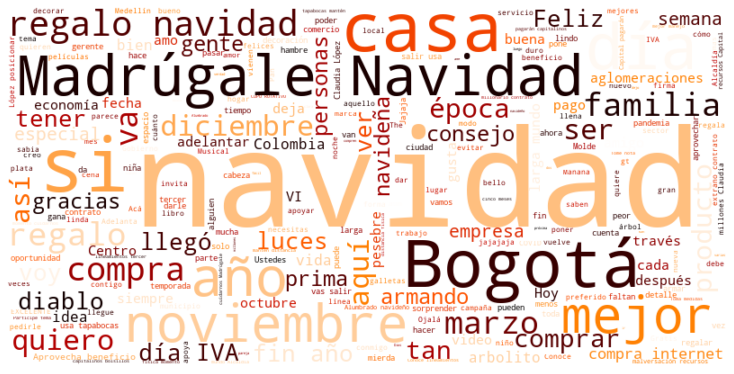

In [55]:
palabras = df.tweet_clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, # Ajustamos el tamaño
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #apaga el eje para que no se visualice
plt.tight_layout(pad=0)
plt.show()

In [60]:
translator = Translator()
df['ing'] = df['tweet_clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
df.head()

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing
0,0,Molde Bastón Navidad Termoformado Goma Eva Man...,2020-11-21 10:00:02,Bogotá,Molde Bastón Navidad Termoformado Goma Eva Man...,"[https://t.co/kdfPtAxHB7, https://t.co/1m1D1YU...",[],[],"Translated(src=es, dest=en, text=Christmas Can..."
1,1,Navidad dejo de ser navidad desde que mi famil...,2020-11-21 09:41:41,Bogotá,Navidad dejo de ser navidad desde que mi famil...,[],[],[],"Translated(src=es, dest=en, text=Christmas sto..."
2,2,¿Busca trabajo esta temporada? Tenga en cuenta...,2020-11-21 08:35:08,Bogotá,¿Busca trabajo esta temporada? Tenga en cuenta...,[https://t.co/7drflGgnes],[],[],"Translated(src=es, dest=en, text=Looking for w..."
3,3,Ya decorada mi casa gracias a Dios vamos por u...,2020-11-21 08:31:20,Bogotá,Ya decorada mi casa gracias a Dios vamos por u...,[https://t.co/kedj4fVFGY],[],[],"Translated(src=es, dest=en, text=I've already ..."
4,4,mentiras que de navidad quiero dejar de estar ...,2020-11-21 06:00:12,Bogotá,mentiras que de navidad quiero dejar de estar ...,[],[],[],"Translated(src=es, dest=en, text=lies that at ..."


In [62]:
df['ingles_trad'] = df['ing'].apply(lambda valor: valor.text)
df.head()

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing,ingles_trad
0,0,Molde Bastón Navidad Termoformado Goma Eva Man...,2020-11-21 10:00:02,Bogotá,Molde Bastón Navidad Termoformado Goma Eva Man...,"[https://t.co/kdfPtAxHB7, https://t.co/1m1D1YU...",[],[],"Translated(src=es, dest=en, text=Christmas Can...",Christmas Cane Mold Thermoformed Eva Rubber Craft
1,1,Navidad dejo de ser navidad desde que mi famil...,2020-11-21 09:41:41,Bogotá,Navidad dejo de ser navidad desde que mi famil...,[],[],[],"Translated(src=es, dest=en, text=Christmas sto...",Christmas stopped being Christmas since my fam...
2,2,¿Busca trabajo esta temporada? Tenga en cuenta...,2020-11-21 08:35:08,Bogotá,¿Busca trabajo esta temporada? Tenga en cuenta...,[https://t.co/7drflGgnes],[],[],"Translated(src=es, dest=en, text=Looking for w...",Looking for work this season? Keep these keys ...
3,3,Ya decorada mi casa gracias a Dios vamos por u...,2020-11-21 08:31:20,Bogotá,Ya decorada mi casa gracias a Dios vamos por u...,[https://t.co/kedj4fVFGY],[],[],"Translated(src=es, dest=en, text=I've already ...","I've already decorated my house, thank God we'..."
4,4,mentiras que de navidad quiero dejar de estar ...,2020-11-21 06:00:12,Bogotá,mentiras que de navidad quiero dejar de estar ...,[],[],[],"Translated(src=es, dest=en, text=lies that at ...",lies that at christmas I want to stop being se...


In [66]:
vader = SentimentIntensityAnalyzer()

df['sentimiento'] = df['ingles_trad'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
df.head()

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing,ingles_trad,sentimiento
0,0,Molde Bastón Navidad Termoformado Goma Eva Man...,2020-11-21 10:00:02,Bogotá,Molde Bastón Navidad Termoformado Goma Eva Man...,"[https://t.co/kdfPtAxHB7, https://t.co/1m1D1YU...",[],[],"Translated(src=es, dest=en, text=Christmas Can...",Christmas Cane Mold Thermoformed Eva Rubber Craft,0.0000
1,1,Navidad dejo de ser navidad desde que mi famil...,2020-11-21 09:41:41,Bogotá,Navidad dejo de ser navidad desde que mi famil...,[],[],[],"Translated(src=es, dest=en, text=Christmas sto...",Christmas stopped being Christmas since my fam...,-0.6124
2,2,¿Busca trabajo esta temporada? Tenga en cuenta...,2020-11-21 08:35:08,Bogotá,¿Busca trabajo esta temporada? Tenga en cuenta...,[https://t.co/7drflGgnes],[],[],"Translated(src=es, dest=en, text=Looking for w...",Looking for work this season? Keep these keys ...,0.0000
3,3,Ya decorada mi casa gracias a Dios vamos por u...,2020-11-21 08:31:20,Bogotá,Ya decorada mi casa gracias a Dios vamos por u...,[https://t.co/kedj4fVFGY],[],[],"Translated(src=es, dest=en, text=I've already ...","I've already decorated my house, thank God we'...",0.5574
4,4,mentiras que de navidad quiero dejar de estar ...,2020-11-21 06:00:12,Bogotá,mentiras que de navidad quiero dejar de estar ...,[],[],[],"Translated(src=es, dest=en, text=lies that at ...",lies that at christmas I want to stop being se...,-0.2263


In [67]:
df[['tweet_clean', 'sentimiento']].sort_values('sentimiento')

,tweet_clean,sentimiento
48,😱😱😱 y ahora no te gusta la navidad?,-0.9553
153,Ni reinados de “belleza” ni lucecitas de navid...,-0.8984
262,No me da envidia. ¡MENTIRA SI! Porque justo ah...,-0.8831
65,Si es del demonio entonces q devuelvan al dia...,-0.8689
136,No sé mucho de contratos ni de política y much...,-0.8322
...,...,...
149,Renueva esos espacios que deseas🎄🎄🎄\n Gracias...,0.9796
118,Armando navidad en familia ♥️♥️♥️♥️🎵🎵🎉🎉🎁🎁🎀🎀,0.9818
50,¡Hoy iniciamos Navidad de la mejor forma! 😍\nE...,0.9833
250,🎉🎉Semana de Kits!!!💖💖\nCual es tu preferido?? ...,0.9867


Tweets más positivos 🤗

In [68]:
df.loc[238]['tweet_clean']

'Un día con las tres B para todos !!! BELLO , BUENO Y BENDECIDO 💗... que nos rinda a todos , abrazos !!!\n\nHoy Trabajando en arbolito de navidad , pesebre y Corona de adviento 🌱💗 y en la  compañía hermosa de unos angelitos 💗🙏🏻\n\n '

In [70]:
df.loc[250]['tweet_clean']

'🎉🎉Semana de Kits!!!💖💖\nCual es tu preferido?? 🤔🤔\nCon cual vas a sorprender en está navidad🎅\nPide el tuyo 🙋🏻\u200d♀️🙋🏻\u200d♂️ antes que se agoten!!!\nDomicilio Gratis en Bogotá\nPago contra entrega Daviplata o Nequi\n      '

In [71]:
df.loc[50]['tweet_clean']

'¡Hoy iniciamos Navidad de la mejor forma! 😍\nEstamos muy felices porque nos acompañaste en la gran inauguración de la iluminación navideña en Mi Casa. Amamos compartir contigo estas fechas tan especiales y estamos muy agradecidos. 🤗 '

Tweets más Negativos 😢

In [69]:
df.loc[48]['tweet_clean']

' 😱😱😱 y ahora no te gusta la navidad?'

In [72]:
df.loc[153]['tweet_clean']

'Ni reinados de “belleza” ni lucecitas de navidad ! no deberíamos ser austeros en medio de la pandemia , masacre , desigualdad , pobreza , desempleo , catástrofes y uribismo ? Y en Bogotá con los márgenes de hambre no se debe usar la plata en algo más humano ? O pan y circo 🤦🏽\u200d♀️'

In [73]:
df.loc[262]['tweet_clean']

'No me da envidia. ¡MENTIRA SI! Porque justo ahora toca pagar matrículas y a los 15 días comprar los regalos de navidad 🥺 y no son como uno que pedía una Barbie ¡Ojalá! 😢😢😢 '

In [ ]:
###conda install pytorch=0.4.1 -c pytorch

In [75]:
pip install flair ###😢

  Using cached https://files.pythonhosted.org/packages/4a/49/a812ed93088ba9519cbb40eb9f52341694b31cfa126bfddcd9db3761f3ac/flair-0.6.1.post1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ff/e2/3b51c53dffb1e52d9210ebc01f1fb9f2f6eba9b3201fa971fd3946643c71/ftfy-5.8.tar.gz
  Using cached https://files.pythonhosted.org/packages/91/95/a52d3a83d0a29ba0d6898f6727e9858fe7a43f6c2ce81a5fe7e05f0f4912/mpld3-0.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/91/77/3f0f53856e86af32b1d3c86652815277f7b5f880002584eb30db115b6df5/bpemb-0.3.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/08/582dab5f4b1d5ca23bc6927b4bb977c8ff7f3a87a3b98844ef833e2f5623/segtok-1.5.10.tar.gz
  Using cached https://files.pythonhosted.org/packages/88/c4/de7da5c8702a1e8a7af7b9e77b5456120b025894d5e3a9be5e0404d065a1/sentencepiece-0.1.94-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/a8/63/98858cbead27df7536c7e300c169da0999e9704d022

  ERROR: Could not find a version that satisfies the requirement torch>=1.1.0 (from flair) (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2)
ERROR: No matching distribution found for torch>=1.1.0 (from flair)


In [80]:
ocurrencias = df['sentimiento']
ocurrencias

0      0.0000
1     -0.6124
2      0.0000
3      0.5574
4     -0.2263
        ...  
294   -0.6808
295   -0.3802
296    0.4588
297    0.0000
298    0.8834
Name: sentimiento, Length: 299, dtype: float64

In [86]:
ocurrencias.count

<bound method Series.count of 0      0.0000
1     -0.6124
2      0.0000
3      0.5574
4     -0.2263
        ...  
294   -0.6808
295   -0.3802
296    0.4588
297    0.0000
298    0.8834
Name: sentimiento, Length: 299, dtype: float64>